In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF_by_cell import calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571


Project Directory: /data2/mito_lineage


In [3]:
from matplotlib_venn import venn2


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from mplh import cluster_help

fig_utils from mplh
here


In [6]:
os.chdir(ROOT_DIR)

## Files setup

In [7]:
indir=join(RESULTS,"mttrace")
mapq = "mapq_0"
num_reads = 200
flt3 = "CD34_Flt3L_mt_PolydT"
wt = "CD34_mt_PolydT"



flt3_indir = join(indir, flt3,"mapq_30")
wt_indir = join(indir, wt,"mapq_30")

# sc_coverage_flt3_f = join(flt3_indir,"scPileup_concat_200",flt3+"_200_all.coverage.txt.gz")
# sc_coverage_wt_f = join(wt_indir,"scPileup_concat_200",wt + "_200_all.coverage.txt.gz")

coverage_flt3_dir = join(flt3_indir,flt3+"_scPileup_200")
coverage_wt_dir = join(wt_indir,wt+"_scPileup_200")

concat_flt3_dir = join(flt3_indir,"scPileup_concat_200")
concat_wt_dir = join(wt_indir,"scPileup_concat_200")

In [8]:
min_cells=100
min_reads=10
topN=0
het_thresh = 0.2
min_het_cells = 10

In [10]:
outdir = join(indir, f"lineage_trace/CD34_mt_polydT/reads{min_reads}_cells{min_cells}_topN{topN}_het{het_thresh}_hetC{min_het_cells}/")
if not os.path.exists(outdir):
    os.makedirs(outdir)
outdir

'/data2/mito_lineage/data/processed/mttrace/lineage_trace/CD34_mt_polydT/reads10_cells100_topN0_het0.2_hetC10/'

### Get CD34 with and without Flt3L, first using polydT+mt
### Create allele frequency matrix for both, but add metadata for each cell about which experiment it came from
### Cluster and look

### Additional requirements is to remove poor-quality variants of BQ- see if Erick has the code of the mixture model

In [11]:
print(ref_fa)
print(maxBP)
print(coverage_wt_dir)
print(concat_wt_dir)

/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta
16571
/data2/mito_lineage/data/processed/mttrace/CD34_mt_PolydT/mapq_30/CD34_mt_PolydT_scPileup_200
/data2/mito_lineage/data/processed/mttrace/CD34_mt_PolydT/mapq_30/scPileup_concat_200


In [12]:
wt_AF_by_cell, wt_bq_by_cell, wt_af, wt_bq_df, wt_nt_df = calculate_af(coverage_wt_dir, concat_wt_dir, ref_fasta=ref_fa,AF_F=None, maxBP=maxBP, topN=topN, min_cells=min_cells, 
                                                        min_reads=min_reads,
                                                       het_thresh=het_thresh,
                                                       min_het_cells=min_het_cells)

no alt count 5331
topN 0
Number of positions to keep : 576
Number of cells to keep : 887
Positions that pass het filter: 8


In [13]:
wt_AF_by_cell

,8399C,8411C,8412G,8419G,8425C,9438C,9449T,14766T
AAAGCAACACTACAGT-1,0.000000,0.0,0.2,0.000000,0.000000,0.0,0.100000,1.0
TCAGCTCCATCGGACC-1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.166667,0.0
TGCGTGGCACGGCTAC-1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.0
GCATGCGAGTACGTAA-1,0.000000,0.0,0.0,0.000000,0.083333,0.0,0.000000,1.0
ATCACGATCTCGGACG-1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...
CGGAGCTGTGAAATCA-1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
CATCAAGAGAGCTATA-1,0.000000,0.0,0.0,0.058824,0.000000,0.0,0.000000,1.0
TGGTTCCTCAAACCGT-1,0.083333,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.0
CTTTGCGCATGGAATA-1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.0


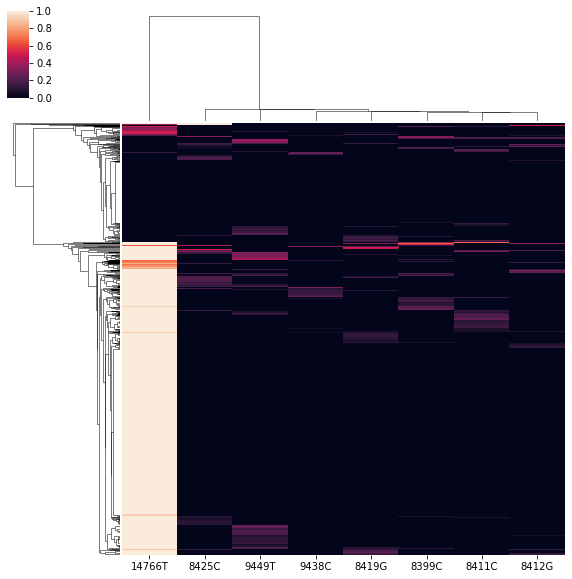

In [21]:
%matplotlib inline
g = sns.clustermap(wt_AF_by_cell, )
g.ax_heatmap.get_yaxis().set_ticks([])
g.ax_heatmap

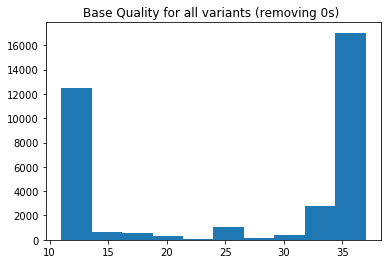

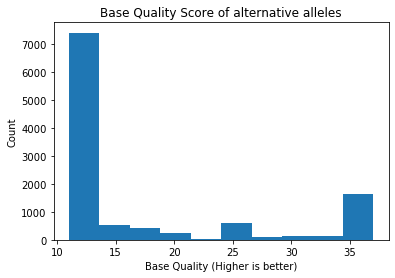

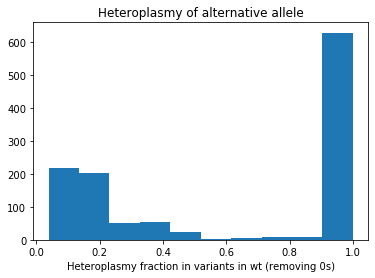

In [22]:
%matplotlib inline
f = plt.figure()
bq_vals = wt_bq_df.values.flatten()
plt.hist(bq_vals[bq_vals>0])
plt.title("Base Quality for all variants (removing 0s) ")
plt.savefig(join(outdir, "wt_base_quality.png"))

plt.figure()
plt.hist(wt_af["Alternative BQ"])
plt.title("Base Quality Score of alternative alleles")
plt.xlabel("Base Quality (Higher is better)")
plt.ylabel("Count")
plt.savefig(join(outdir, "wt_base_quality_altAllele.png"))


f = plt.figure()
af_vals = wt_AF_by_cell.values.flatten()
plt.hist(af_vals[af_vals>0])
plt.title("Heteroplasmy of alternative allele")
plt.xlabel("Heteroplasmy fraction in variants in wt (removing 0s)")
plt.savefig(join(outdir, "wt_heteroplasmy_values.png"))


# flt3

In [23]:
flt3_AF_by_cell, flt3_bq_by_cell, flt3_af, flt3_bq_df, flt3_nt_df = calculate_af(coverage_flt3_dir, concat_flt3_dir, ref_fasta=ref_fa,AF_F=None, maxBP=maxBP, topN=topN, min_cells=min_cells, 
                                                        min_reads=min_reads,
                                                       het_thresh=het_thresh,
                                                       min_het_cells=min_het_cells)

no alt count 2142
topN 0
Number of positions to keep : 1924
Number of cells to keep : 2777
Positions that pass het filter: 296


In [ ]:
# %matplotlib inline
# f = plt.figure()
# bq_vals = flt3_bq_df.values.flatten()
# plt.hist(bq_vals[bq_vals>0])
# plt.title("Base Quality for all variants (removing 0s) ")
# plt.savefig(join(outdir, "flt3_base_quality.png"))

# plt.figure()
# plt.hist(flt3_af["Alternative BQ"])
# plt.title("Base Quality Score of alternative alleles")
# plt.xlabel("Base Quality (Higher is better)")
# plt.ylabel("Count")
# plt.savefig(join(outdir, "flt3_base_quality_altAllele.png"))


# f = plt.figure()
# af_vals = flt3_AF_by_cell.values.flatten()
# plt.hist(af_vals[af_vals>0])
# plt.title("Heteroplasmy of alternative allele")
# plt.xlabel("Heteroplasmy fraction in variants in flt3 (removing 0s)")
# plt.savefig(join(outdir, "flt3_heteroplasmy_values.png"))


## Merge the two 

In [24]:
flt3_AF_by_cell.index = flt3_AF_by_cell.index + "_flt3"
wt_AF_by_cell.index = wt_AF_by_cell.index + "_wt"


In [25]:
all_cells = pd.concat((wt_AF_by_cell,flt3_AF_by_cell) ,axis=1)


/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [26]:
all_cells_var_overlap = pd.concat((wt_AF_by_cell,flt3_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_var_overlap.columns.values
all_cells_var_overlap


,8399C,8411C,8412G,8419G,8425C,9449T,14766T
AAAGCAACACTACAGT-1_wt,0.000000,0.0,0.2,0.0,0.000000,0.100000,1.0
TCAGCTCCATCGGACC-1_wt,0.000000,0.0,0.0,0.0,0.000000,0.166667,0.0
TGCGTGGCACGGCTAC-1_wt,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
GCATGCGAGTACGTAA-1_wt,0.000000,0.0,0.0,0.0,0.083333,0.000000,1.0
ATCACGATCTCGGACG-1_wt,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...
GTCATTTCAGCCTGTG-1_flt3,0.000000,0.2,0.0,0.0,0.000000,0.000000,1.0
CTAACTTCAGGGTTAG-1_flt3,0.100000,0.0,0.0,0.0,0.000000,0.000000,1.0
TGGTTAGTCGTAGGAG-1_flt3,0.090909,0.0,0.0,0.0,0.000000,0.000000,0.0
TCCCGATAGCATGGCA-1_flt3,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0


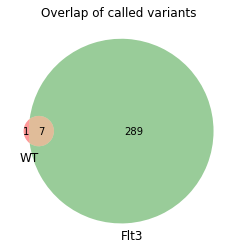

In [27]:
%matplotlib inline
venn2([set(wt_AF_by_cell.columns.values),set(flt3_AF_by_cell.columns.values)],set_labels=["WT","Flt3"])
plt.title("Overlap of called variants")
plt.savefig(join(outdir,"overlap_variants_with_without_ligand.png"))

## Plot the lineage tracing 

### With only the overlapping variants

In [28]:
all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)
all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

In [29]:
pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]})

,Sample
TCGCGTTCATGGGACA-1_flt3,Flt3
ACTGAGTTCACGATGT-1_flt3,Flt3
GTTACAGCAAGCTGGA-1_flt3,Flt3
CACCAGGAGAGACGAA-1_flt3,Flt3
AGGTCATCACTAAGTC-1_flt3,Flt3
...,...
GTCATTTCAGCCTGTG-1_flt3,Flt3
CTAACTTCAGGGTTAG-1_flt3,Flt3
TGGTTAGTCGTAGGAG-1_flt3,Flt3
TCCCGATAGCATGGCA-1_flt3,Flt3


In [30]:

row_meta = pd.concat((pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= wt_AF_by_cell.index, data={"Sample":["wt"]*wt_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells_var_overlap.index]
row_meta

,Sample
AAAGCAACACTACAGT-1_wt,wt
TCAGCTCCATCGGACC-1_wt,wt
TGCGTGGCACGGCTAC-1_wt,wt
GCATGCGAGTACGTAA-1_wt,wt
ATCACGATCTCGGACG-1_wt,wt
...,...
GTCATTTCAGCCTGTG-1_flt3,Flt3
CTAACTTCAGGGTTAG-1_flt3,Flt3
TGGTTAGTCGTAGGAG-1_flt3,Flt3
TCCCGATAGCATGGCA-1_flt3,Flt3


cmap None


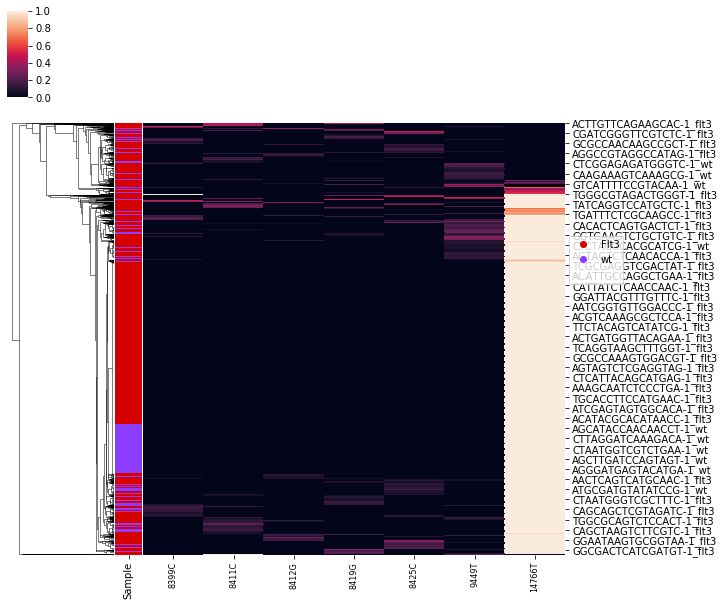

In [31]:
%matplotlib inline
cluster_help.plot_cluster(df=all_cells_var_overlap, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_OnlyoverlapVariants.png"))

## Plot number of overlapping positions from Flt3 and without

### With all variants

cmap None


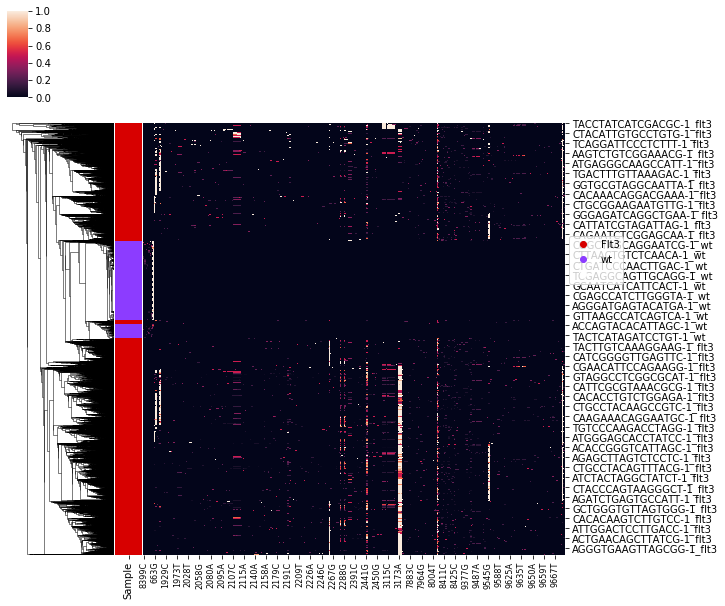

In [32]:
all_cells = all_cells.fillna(0)
all_cells = all_cells.drop((all_cells==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells = all_cells.drop((all_cells==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

# row_meta = pd.concat((pd.DataFrame(index=flt3_cell, data={"Sample":["Flt3"]*flt3_cell.shape[0]}),
#            pd.DataFrame(index=wt_cell, data={"Sample":["wt"]*wt_cell.shape[0]})))
# row_meta = row_meta.loc[all_cells.index]

row_meta = pd.concat((pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= wt_AF_by_cell.index, data={"Sample":["wt"]*wt_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells.index]
row_meta


g = cluster_help.plot_cluster(df=all_cells, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_AllVariants.png"))

## Clustering

In [41]:
from sklearn.decomposition import PCA

import numpy as np

In [60]:
from src import utils

/data2/mito_lineage/src/utils.py:86: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


                       8399C  8411C  8412G  8419G     8425C  9438C     9449T  \
AAAGCAACACTACAGT-1_wt    0.0    0.0    0.2    0.0  0.000000    0.0  0.100000   
TCAGCTCCATCGGACC-1_wt    0.0    0.0    0.0    0.0  0.000000    0.0  0.166667   
TGCGTGGCACGGCTAC-1_wt    0.0    0.0    0.0    0.0  0.000000    0.0  0.000000   
GCATGCGAGTACGTAA-1_wt    0.0    0.0    0.0    0.0  0.083333    0.0  0.000000   
ATCACGATCTCGGACG-1_wt    0.0    0.0    0.0    0.0  0.000000    0.0  0.000000   

                       14766T  embedding_1  embedding_2  
AAAGCAACACTACAGT-1_wt     1.0    -0.268518    -0.022234  
TCAGCTCCATCGGACC-1_wt     0.0     0.730788    -0.026052  
TGCGTGGCACGGCTAC-1_wt     1.0    -0.269787    -0.017296  
GCATGCGAGTACGTAA-1_wt     1.0    -0.269479     0.065814  
ATCACGATCTCGGACG-1_wt     1.0    -0.269787    -0.017296  
                       8399C  8411C  8412G  8419G     8425C  9438C     9449T  \
AAAGCAACACTACAGT-1_wt    0.0    0.0    0.2    0.0  0.000000    0.0  0.100000   
TCAGCTCCATC

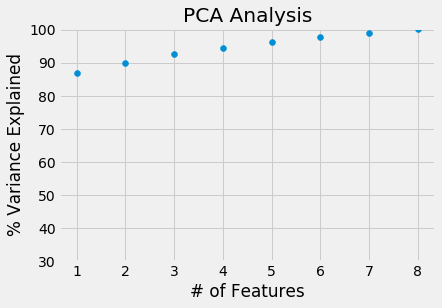

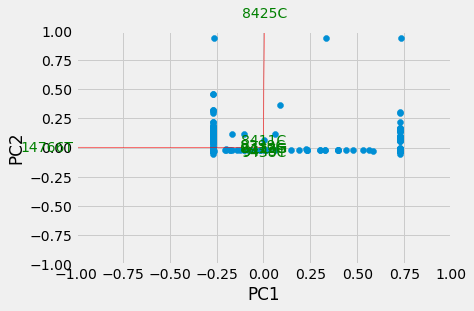

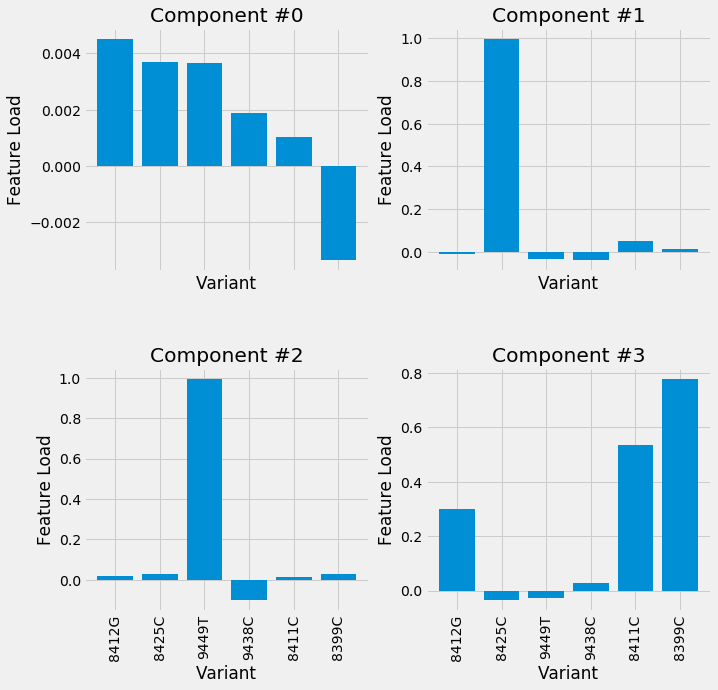

In [95]:
data, p_comp = utils.construct_pca(wt_AF_by_cell.copy())


In [97]:
all_cells.head()

,8399C,8411C,8412G,8419G,8425C,9438C,9449T,14766T,663G,709A,...,9665T,9666T,9667T,9669T,9670C,9672A,9673T,10524C,14766T,14780C
AAACCTGAGCCACGTC-1_flt3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
AAACCTGCATACTACG-1_flt3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AAACCTGCATCACCCT-1_flt3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.000000
AAACCTGGTATGAATG-1_flt3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
AAACCTGGTCCGCTGA-1_flt3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333


/data2/mito_lineage/src/utils.py:86: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


                       8399C  8411C  8412G  8419G     8425C  9438C     9449T  \
AAAGCAACACTACAGT-1_wt    0.0    0.0    0.2    0.0  0.000000    0.0  0.100000   
TCAGCTCCATCGGACC-1_wt    0.0    0.0    0.0    0.0  0.000000    0.0  0.166667   
TGCGTGGCACGGCTAC-1_wt    0.0    0.0    0.0    0.0  0.000000    0.0  0.000000   
GCATGCGAGTACGTAA-1_wt    0.0    0.0    0.0    0.0  0.083333    0.0  0.000000   
ATCACGATCTCGGACG-1_wt    0.0    0.0    0.0    0.0  0.000000    0.0  0.000000   

                       14766T  embedding_1  embedding_2  
AAAGCAACACTACAGT-1_wt     1.0    -0.268518    -0.022234  
TCAGCTCCATCGGACC-1_wt     0.0     0.730788    -0.026052  
TGCGTGGCACGGCTAC-1_wt     1.0    -0.269787    -0.017296  
GCATGCGAGTACGTAA-1_wt     1.0    -0.269479     0.065814  
ATCACGATCTCGGACG-1_wt     1.0    -0.269787    -0.017296  
                       8399C  8411C  8412G  8419G     8425C  9438C     9449T  \
AAAGCAACACTACAGT-1_wt    0.0    0.0    0.2    0.0  0.000000    0.0  0.100000   
TCAGCTCCATC

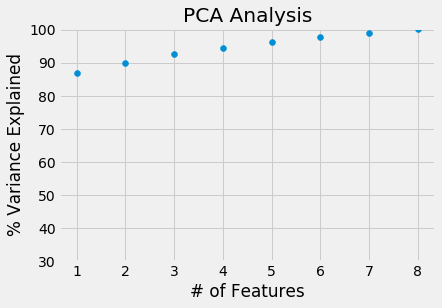

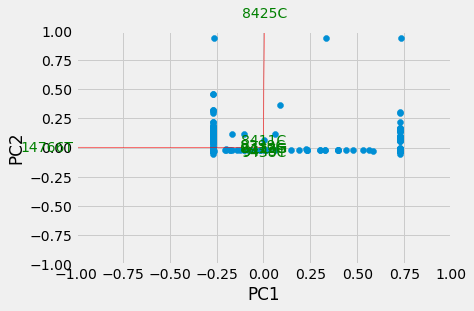

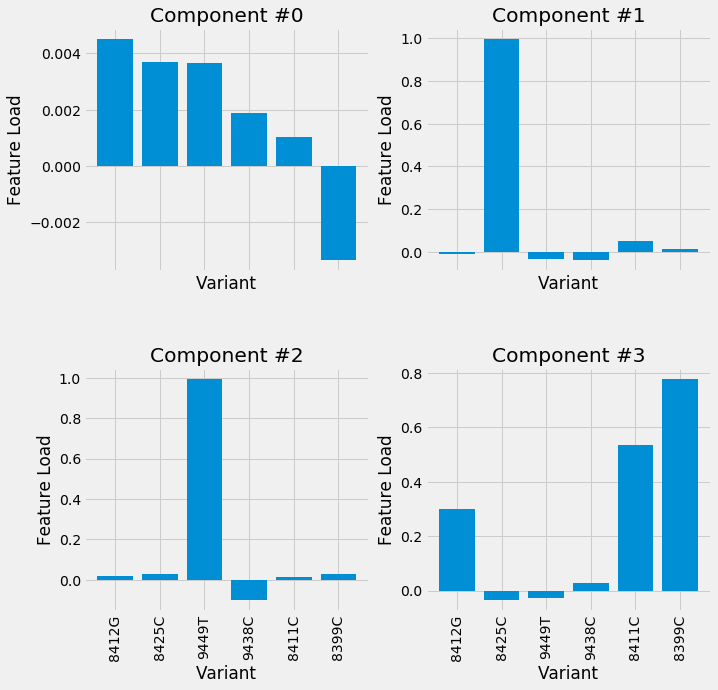

In [95]:
data, p_comp = utils.construct_pca(all_cells.copy())
